# Unit Testing for Algorithms 

## Simple sanity checks for fitting and smoothing algorithms I used for this project


In [1]:
# Setup
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append("src")
#import algorithms
from sinefit import sinfit     
from peakfinder import peakfinder
from smoothing import smoothTriangle

## Peakfinder Algorithm:

### Verdict: it works

Amplitude=0.9922861012090539, Angular freq.=2.0318017905303987, phase=0.3257125574534292, offset=3.9802085071816347, Max. Cov.=0.014412243419908165


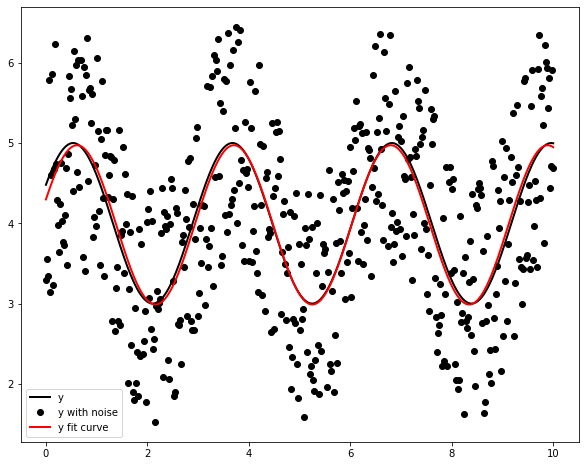

In [2]:
N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
tt = np.linspace(0, 10, N)
tt2 = np.linspace(0, 10, 10*N)
yy = amp*np.sin(omega*tt + phase) + offset
yynoise = yy + noise*(np.random.random(len(tt))-0.5)

res = sinfit(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )
plt.rcParams["figure.figsize"]=10,8 
plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

## Peak Finder Algorithm:

### Verdict: it works for sufficiently smoothed data sets, and significantly better than scipy's own peakfinder algorithms (I spent quite a while trying to whittle down the returned peaks, didn't work)

In [8]:
peakwidth = 2
peaks, indx = peakfinder(yy, tt, peakwidth)

#Scipy peakfinder via 
refc = scipy.signal.savgol_filter(yy,399, 6)
print('My algorithm: ', peaks, indx)
print('Scipy implementation: ', refc)


My algorithm:  [4.999935384962691, 4.999813523421052, 4.999950872246836, 4.999999868636526] [27, 183, 340, 497]
Scipy implementation:  [4.42099552 4.4968012  4.56689144 4.63146865 4.69073108 4.74487277
 4.7940837  4.83854977 4.87845287 4.91397094 4.94527801 4.97254425
 4.99593599 5.01561583 5.03174263 5.04447159 5.05395428 5.06033869
 5.06376928 5.06438703 5.06232949 5.05773079 5.05072175 5.04142985
 5.02997934 5.01649125 5.00108343 4.98387064 4.96496451 4.94447367
 4.92250376 4.89915745 4.8745345  4.84873183 4.82184352 4.79396086
 4.76517244 4.73556411 4.70521909 4.67421796 4.64263877 4.61055699
 4.57804562 4.54517519 4.51201385 4.47862733 4.44507906 4.41143015
 4.37773946 4.34406364 4.31045714 4.27697227 4.24365924 4.21056619
 4.17773921 4.14522243 4.11305797 4.08128608 4.04994507 4.01907144
 3.98869985 3.95886319 3.92959258 3.90091747 3.87286559 3.84546304
 3.81873432 3.79270235 3.76738848 3.74281259 3.71899305 3.6959468
 3.67368935 3.65223486 3.6315961  3.61178455 3.59281039 3.5746

## Smoothing Algorithm

### Verdict: works as expected

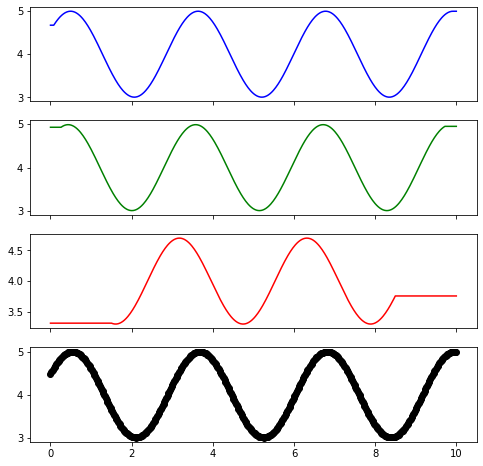

In [10]:
smooth1 = smoothTriangle(yy, 3)
smooth2 = smoothTriangle(yy, 9)
smooth3 = smoothTriangle(yy, 50)

fig, ax = plt.subplots(4, 1, figsize =(8,8), sharex = True)
ax[0].plot(tt, smooth1, c = 'blue')
ax[1].plot(tt, smooth2, c = 'green')
ax[2].plot(tt, smooth3, c = 'red')
ax[3].scatter(tt, yy, c='black')